## BOS - TMDS Vital Signs Analysis

### Ler os arquivos de log

Análise é feita em todos os arquivos <b>*.txt</b> que estão dentro da pasta <b>logs</b>.

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import seaborn as sns
import warnings
from tqdm import tqdm

In [ ]:
# salva o caminho de todos os arquivos BackOfficeServer*.txt da pasta logs
all_files_path = glob.glob("logs/BackOfficeServer*.txt")
# palavras-chave para buscar nas linhas do arquivo
key_words = [['TMDS VITAL SIGNS'],['Num of train']]
working_memory_list = []
num_of_trains_list = []
# ler abre e ler as linhas do arquivo a partir das key_words
i = 1
for file_path in tqdm(all_files_path):
    print(f"Processando arquivos: {i}/{len(all_files_path)}")
    file = open(file_path,'r')
    lines = file.readlines()
    # encontra a palavra chave 'TMDS VITAL SIGNS' e retorna as 10 linhas seguintes em uma lista
    working_memory_list += [lines[index:index+3:2] for index, line in enumerate(lines) if any(word in line for word in key_words[0])] 
    # encontra a palavra chave 'Percent memory used is' e retorna as 2 linhas seguintes em uma lista
    num_of_trains_list += [lines[index] for index, line in enumerate(lines) if any(word in line for word in key_words[1])]
    # fecha conexão com o arquivo
    file.close()
    i+=1
print("Total de arquivos lidos:", len(all_files_path))
print("Total de eventos capturados (WORKING MEMORY) :", len(working_memory_list))
print("Total de eventos capturados (Num of trains) :", len(num_of_trains_list))



  0%|          | 0/16 [00:00<?, ?it/s]

Processando arquivos: 1/16




  6%|▋         | 1/16 [00:01<00:20,  1.36s/it]

Processando arquivos: 2/16




 12%|█▎        | 2/16 [00:02<00:19,  1.37s/it]

Processando arquivos: 3/16


### Pré-processamento dos dados de texto
Preparando o texto descartando as partes menos úteis: converter texto para lowercase, remoção de palavras irrelevantes e backslash notation.

In [3]:
# salva datetime da primeira linha da lista tmds_vital_signs_list e converte milisegundos para microsegundos
event_datetime_list = [ line[0].split('     ',1)[0] + '000' for line in working_memory_list ]
# convert string to datetime
event_datetime_list = [ pd.to_datetime(date) for date in event_datetime_list ]
working_memory_processed_list = [ line[1].split(': ',1)[1][:-1] for line in working_memory_list ]
# convert string to float
working_memory_processed_list = [ float(working_memory) for working_memory in working_memory_processed_list ]
num_of_trains_list = [ line.split('Num of trains')[-1].split()[0][1:] for line in num_of_trains_list ]
# convert string to int
num_of_trains_list = [ int(num_of_trains) for num_of_trains in num_of_trains_list ]

### Gráfico

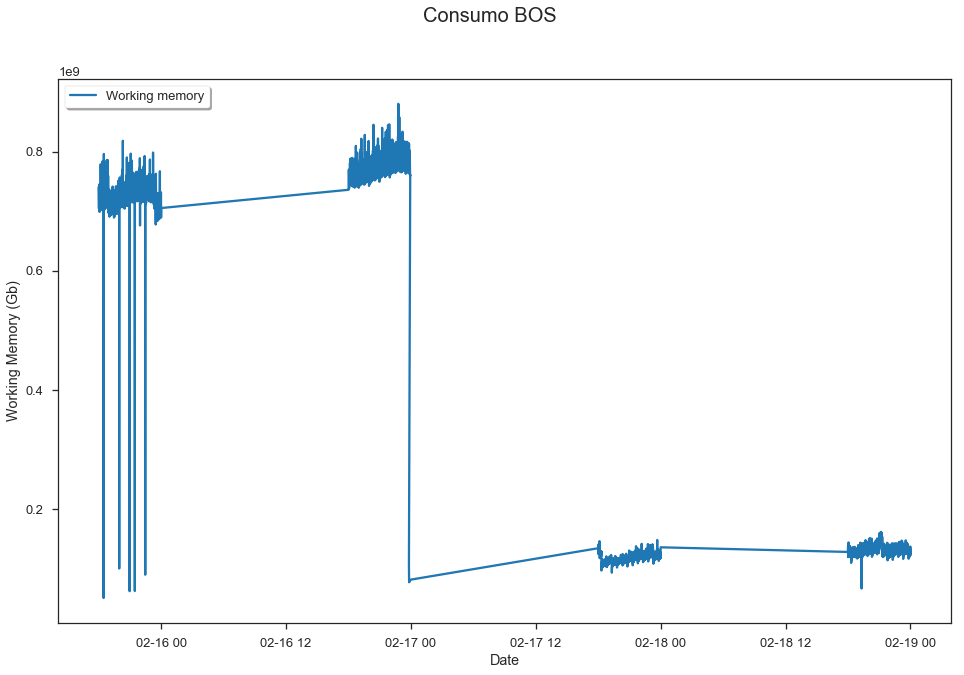

In [4]:
sns.set_style("ticks")
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(16, 10))
fig.suptitle('Consumo BOS', fontsize=20)
ax.plot(event_datetime_list, working_memory_processed_list)
ax.legend(['Working memory'], 
          loc='upper left',
          shadow=True, 
          frameon=True)
plt.ylabel('Working Memory (Gb)')
plt.xlabel('Date');
plt.show()

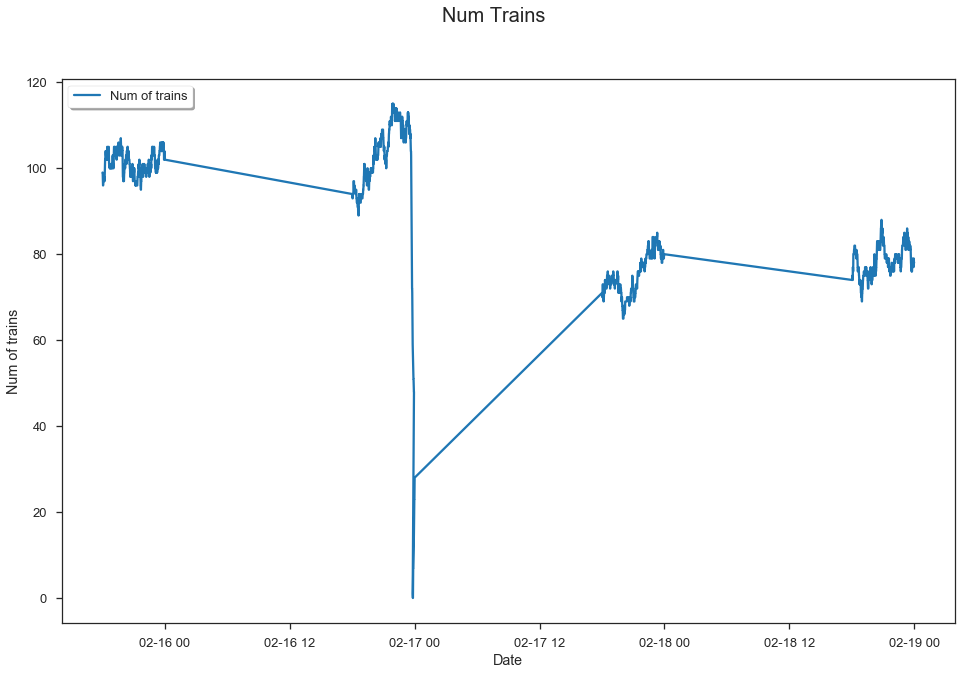

In [5]:
fig, ax = plt.subplots(figsize=(16, 10))
fig.suptitle('Num Trains', fontsize=20)
ax.plot(event_datetime_list, num_of_trains_list)
ax.legend(['Num of Trains'], 
          loc='upper left',
          shadow=True, 
          frameon=True)
plt.ylabel('Num of trains')
plt.xlabel('Date');
plt.show()